# In this Project, I have created a baseline analysis to understand some characteristics about the different wines based on the regions and different wineries. 

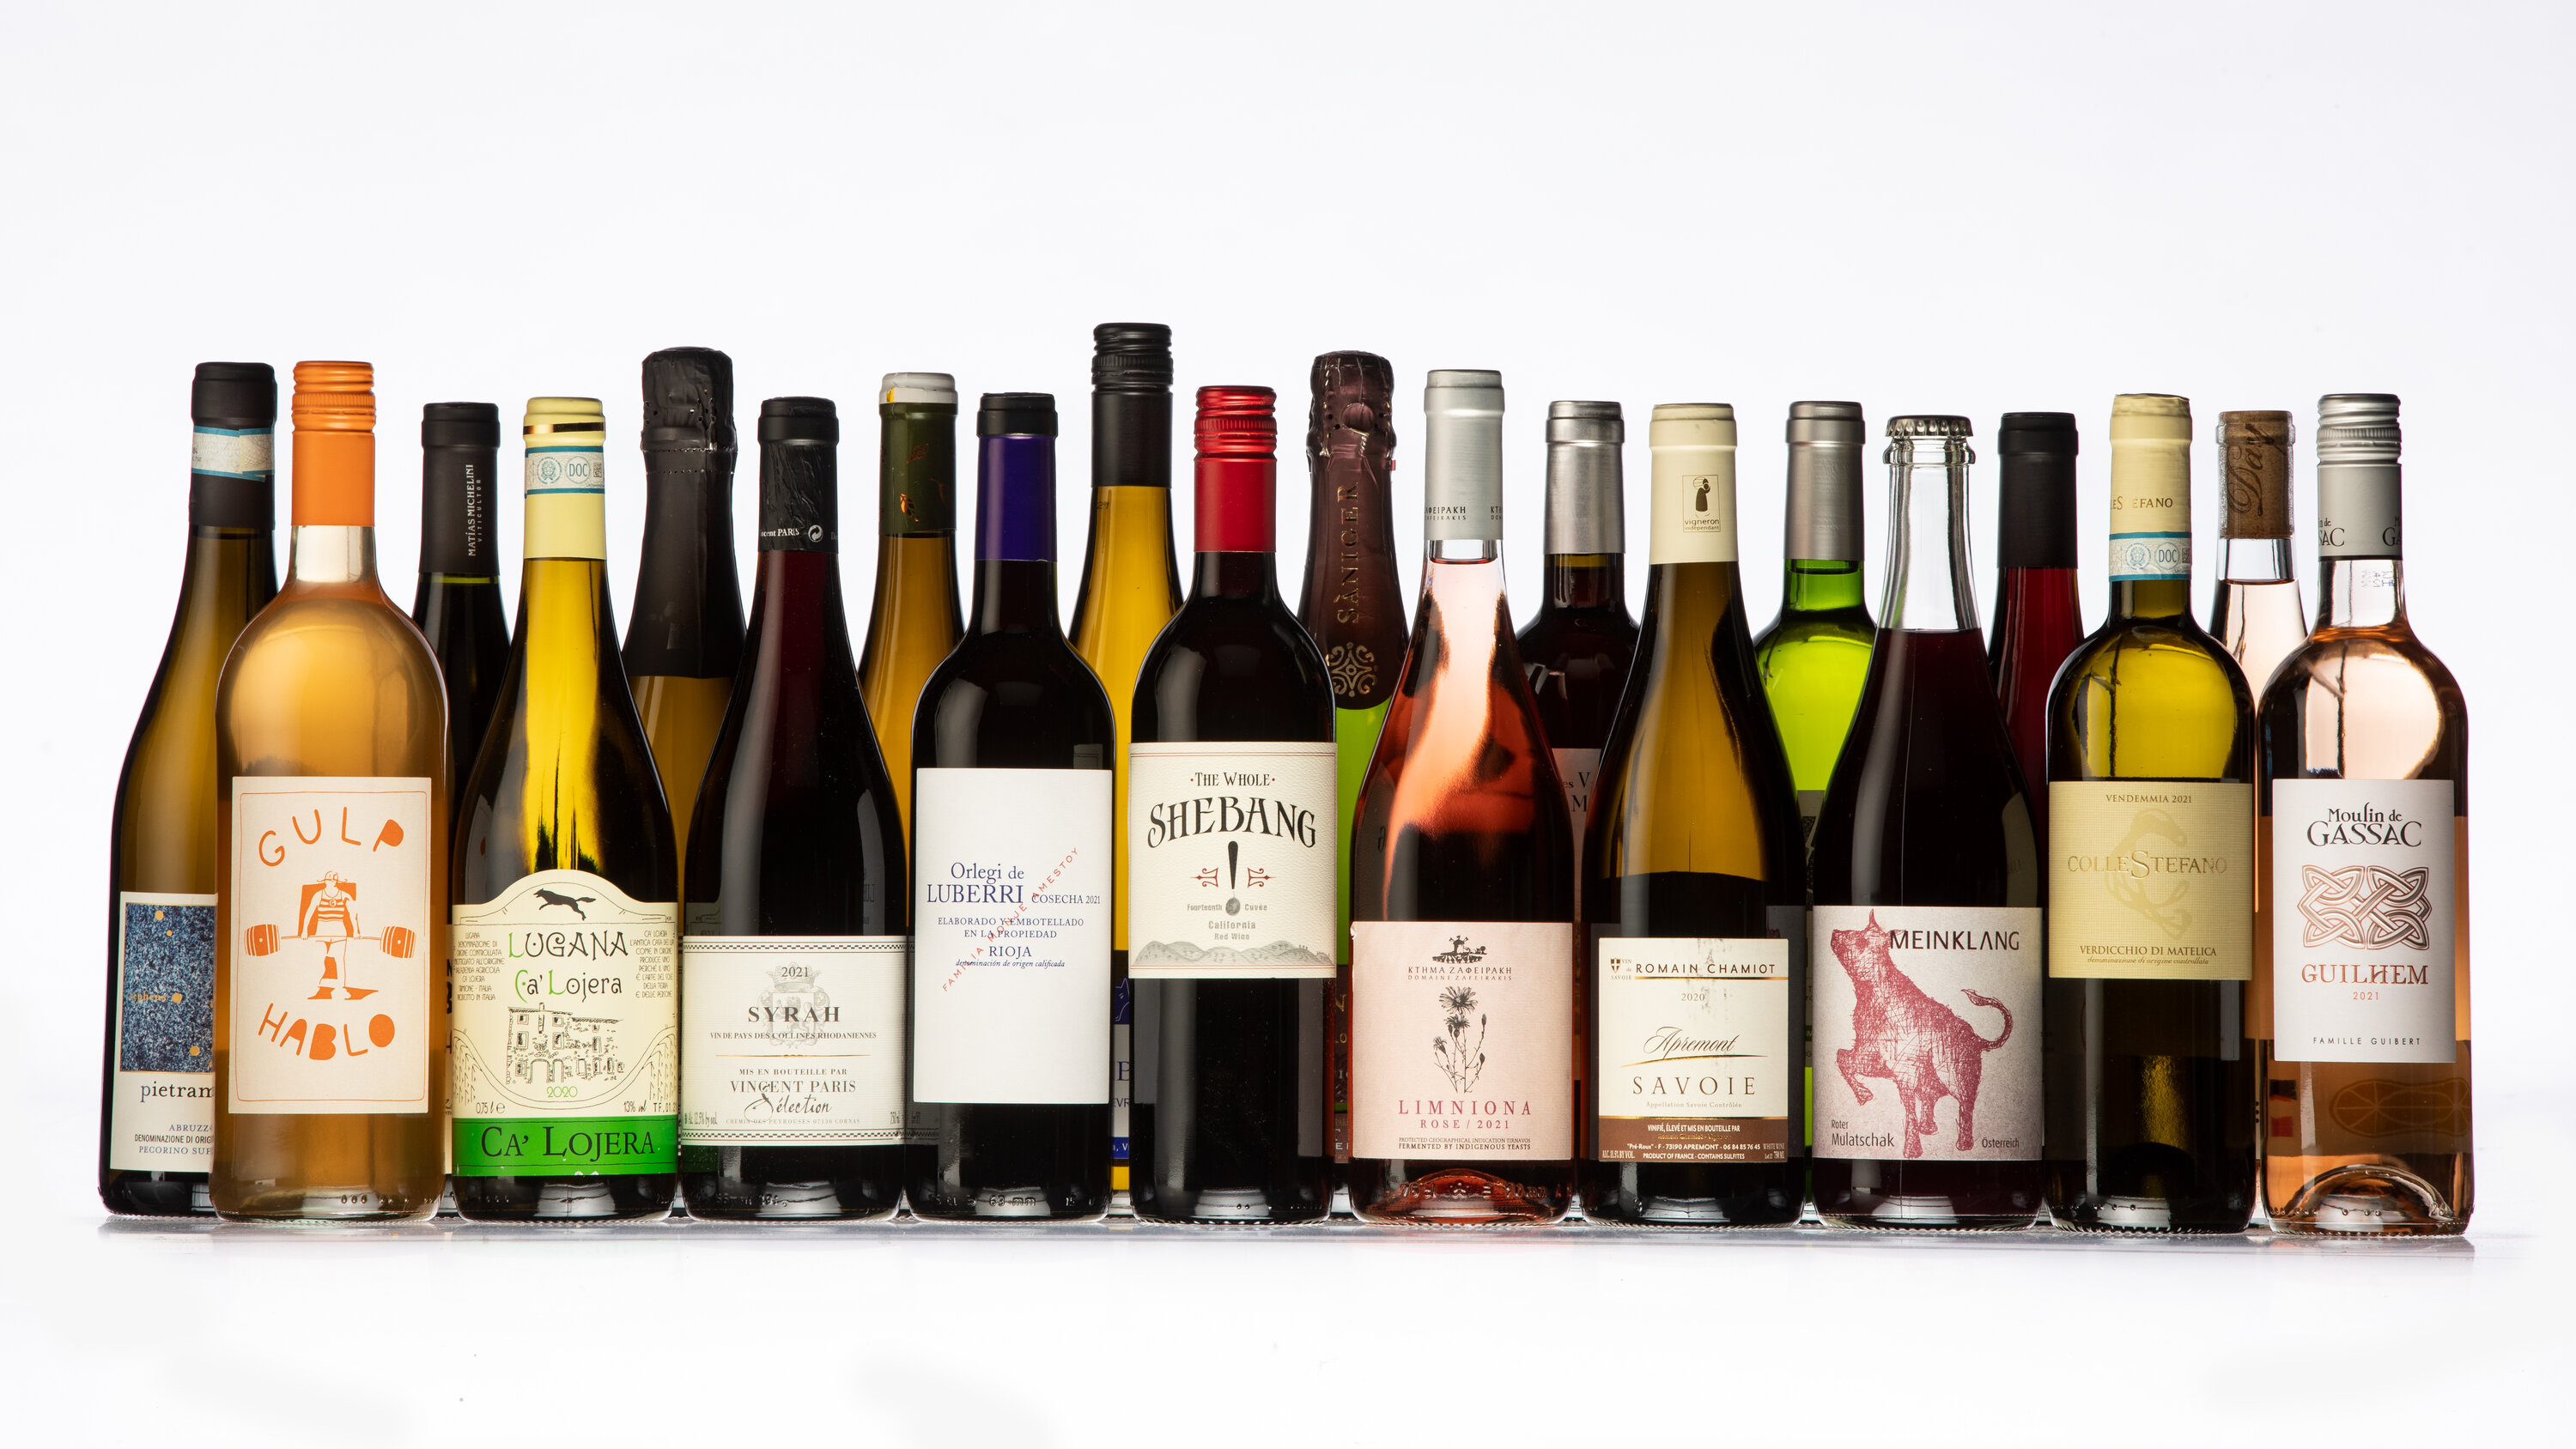

## Context

I'll start exploring the data to find for interesting informations about the wine quality based on the sommeliers comments. 



## I will try answer a batch of questions, like:

- Have an Provinces the same number of wines? <br>
- Whats the distribuition of Price and Points by Province? <br>
- Whats the country distribuition<br>
- The taster's have the same number of votings? <br>
- What's the distribuition of Points and Prices by taster's name?   <br>
- Taking a look on the word clouds.    <br>
     

## Importing Libraries

In [1]:
import pandas as pd #Library to handle with dataframes
import matplotlib.pyplot as plt # Library to plot graphics
import numpy as np # To handle with matrices
import seaborn as sns # to build modern graphics
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## Functions def

In [2]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def CalcOutliers(df_num): 
    '''
    
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return



In [3]:
# Importing our dataset in variable df_wine1
df_wine1 = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

<h2>Let's take a first look on our data</h2>

- A simple histogram can be a great first step in understanding a dataset. <br>

*I will start with univariate analysis and after it, I will cross some features by the numerical *

In [4]:
resumetable(df_wine1)

Dataset Shape: (129971, 13)


Name   dtypes  Missing  Uniques  \
0                 country   object       63       43   
1             description   object        0   119955   
2             designation   object    37465    37979   
3                  points    int64        0       21   
4                   price  float64     8996      390   
5                province   object       63      425   
6                region_1   object    21247     1229   
7                region_2   object    79460       17   
8             taster_name   object    26244       19   
9   taster_twitter_handle   object    31213       15   
10                  title   object        0   118840   
11                variety   object        1      707   
12                 winery   object        0    16757   

                                          First Value  \
0                                               Italy   
1   Aromas include tropical fruit, broom, brimston...   
2                                        Vulkà Bianco   
3                                                  87   
4                                                 NaN   
5                                   Sicily & Sardinia   
6                                                Etna   
7                                                 NaN   
8                                       Kerin O’Keefe   
9                                        @kerinokeefe   
10                  Nicosia 2013 Vulkà Bianco  (Etna)   
11                                        White Blend   
12                                            Nicosia   

                                         Second Value  \
0                                            Portugal   
1   This is ripe and fruity, a wine that is smooth...   
2                                            Avidagos   
3                                                  87   
4                                                15.0   
5                                               Douro   
6                                                 NaN   
7                                                 NaN   
8                                          Roger Voss   
9                                          @vossroger   
10      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
11                                     Portuguese Red   
12                                Quinta dos Avidagos   

                                          Third Value  Entropy  
0                                                  US     2.77  
1   Tart and snappy, the flavors of lime flesh and...    16.83  
2                                                 NaN    13.83  
3                                                  87     3.64  
4                                                14.0     5.77  
5                                              Oregon     5.05  
6                                   Willamette Valley     7.89  
7                                   Willamette Valley     3.28  
8                                        Paul Gregutt     3.39  
9                                         @paulgwine      3.23  
10      Rainstorm 2013 Pinot Gris (Willamette Valley)    16.81  
11                                         Pinot Gris     5.67  
12                                          Rainstorm    12.98

<h2>Let's start looking the distribuition of Points and Prices </h2>

In [5]:
# The function describe is focused on numerical features
# in this case are points and price
print("Statistics of numerical data: ")
print(df_wine1.describe())

Statistics of numerical data: 
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


Very interesting distribuition of Points and Price.
- We can see that the values of points are distributed between 80 and 100
- The price have a high difference between the values and a high standard deviation
- In prices, the IQR (Interquantil Range) is 25. The max value is 3300;

We will explore it further later, lets start. 

# Points Distribution
- I will start exploring points and after I will see the same on price
- Let's see the points distributions and quantiles

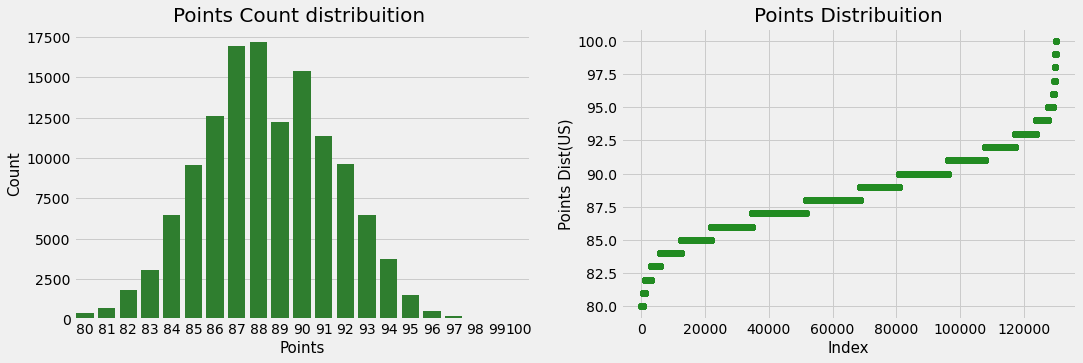

In [6]:
# define the size of figures that I will build
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=df_wine1, color='forestgreen') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(df_wine1.shape[0]), np.sort(df_wine1.points.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

We can clearly see the distribuitioon of the data. It seems very similar with a normal distribution. 

Just a few number of wines have less than 82 points and more than 95 points. 

As Points are one of the most important metrics in this dataset, I will explore it furthuer more. 

I will find for more important informations like quantiles and maybe try to set wines in categories based on it

## Let's set the points into categories.
- I will create a new feature containing the range of the points with a rank to this pontuations

In [7]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

df_wine1["rating_cat"] = df_wine1["points"].apply(cat_points)

## Ploting Rating categories
- Let's see the distribution after the transformation

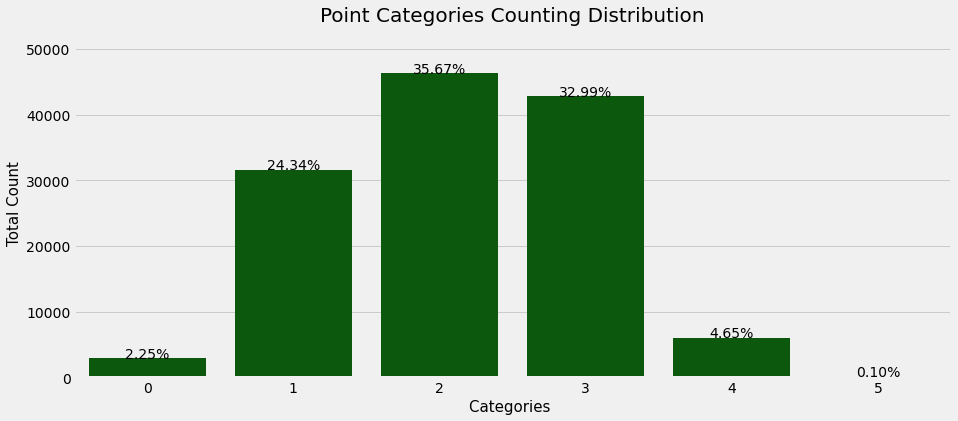

In [8]:
total = len(df_wine1)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen',
                  data=df_wine1)
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

Nice! Now we can have a clearly understand of our data in a more clean way. It could be interesting to compare each other regions; 

to 

## Detecting Outlier Points

In [9]:
CalcOutliers(df_wine1['points'])

Identified lowest outliers: 0
Identified upper outliers: 129
Identified outliers: 129
Non-outlier observations: 129842
Total percentual of Outliers:  0.0994


Very interesting informations! 

We can see that all outliers of this feature is in upper values.<br>

Also, we have less than 0,01% of outlier values in points.... Just 129 wines have more than 98 points.  

We will apply it on Price too... Let's start the understanding of it now. 

# Price Distribution

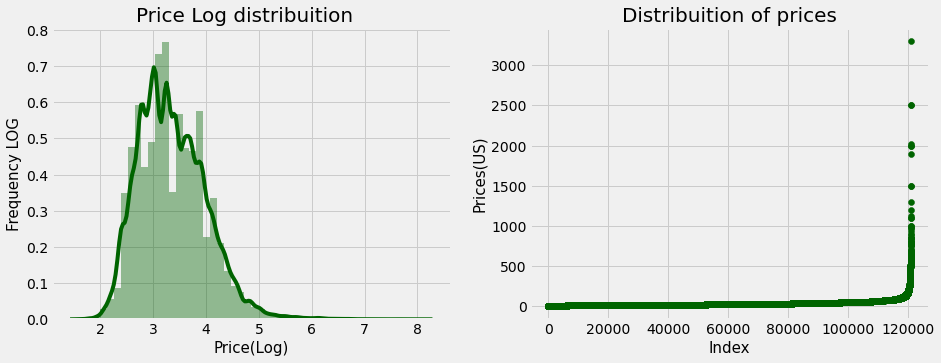

In [10]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df_wine1['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df_wine1.shape[0]), np.sort(df_wine1.price.values), 
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

Nice!!! The Price Log give us an impression that the data could normaly distributed, but like in points, we need to test.

## Outliers in Prices

In [11]:
CalcOutliers(df_wine1['price'])

Identified lowest outliers: 0
Identified upper outliers: 1177
Identified outliers: 1177
Non-outlier observations: 119798
Total percentual of Outliers:  0.9825


Cool. Now we can clearly see that we have less than 1% of outliers, that is 1177 prices that is out of our range

# Let's see a filtered distribution of Prices

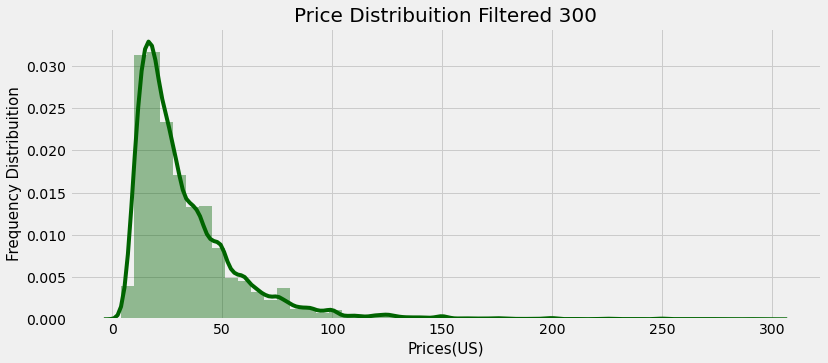

In [12]:
plt.figure(figsize=(12,5))

g = sns.distplot(df_wine1[df_wine1['price'] < 300]['price'], color='darkgreen')
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

Nice. It confirms what we saw in the above exploration. The greastest part of all analyzed wines have values under $ 100;

In [13]:
# Let's get tehe price_log to better work with this feature
df_wine1['price_log'] = np.log(df_wine1['price'])

## Crossing prices and Points

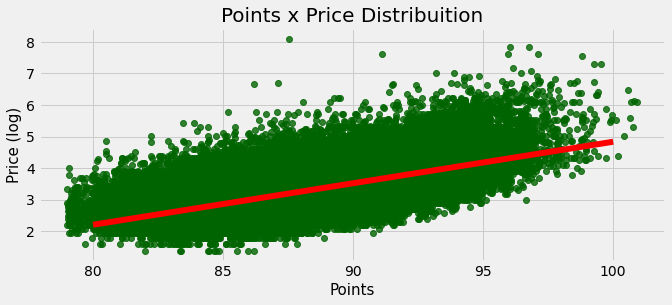

In [14]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df_wine1, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

Very meaningful scatter plot. 
- The highest prices isn't of the wine with highest pontuation. 
- The most expensive wine have ponctuation between 87 and 90

Maybe it would be interesting to build an recommender system to find cheapest wines with the same quality.

# Country Feature

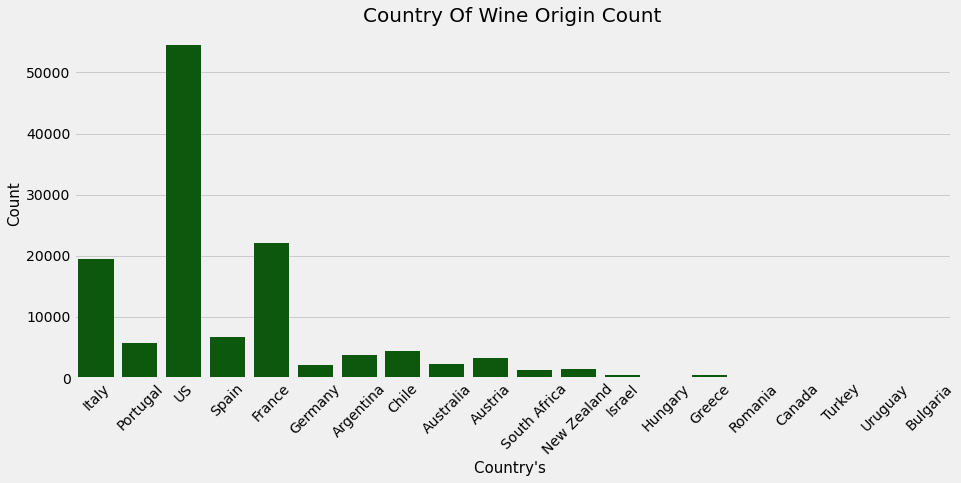

In [15]:
plt.figure(figsize=(14,6))

country = df_wine1.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=df_wine1[df_wine1.country.isin(country.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

Wow, very interesting distribuition. I was expecting to see Italy, Chile or Argentina as the biggest wine productor. <br>
 If you want take a better look, look the print output below

## Now, I will take a look in the distribuition of this top 20 countrys by price and rating

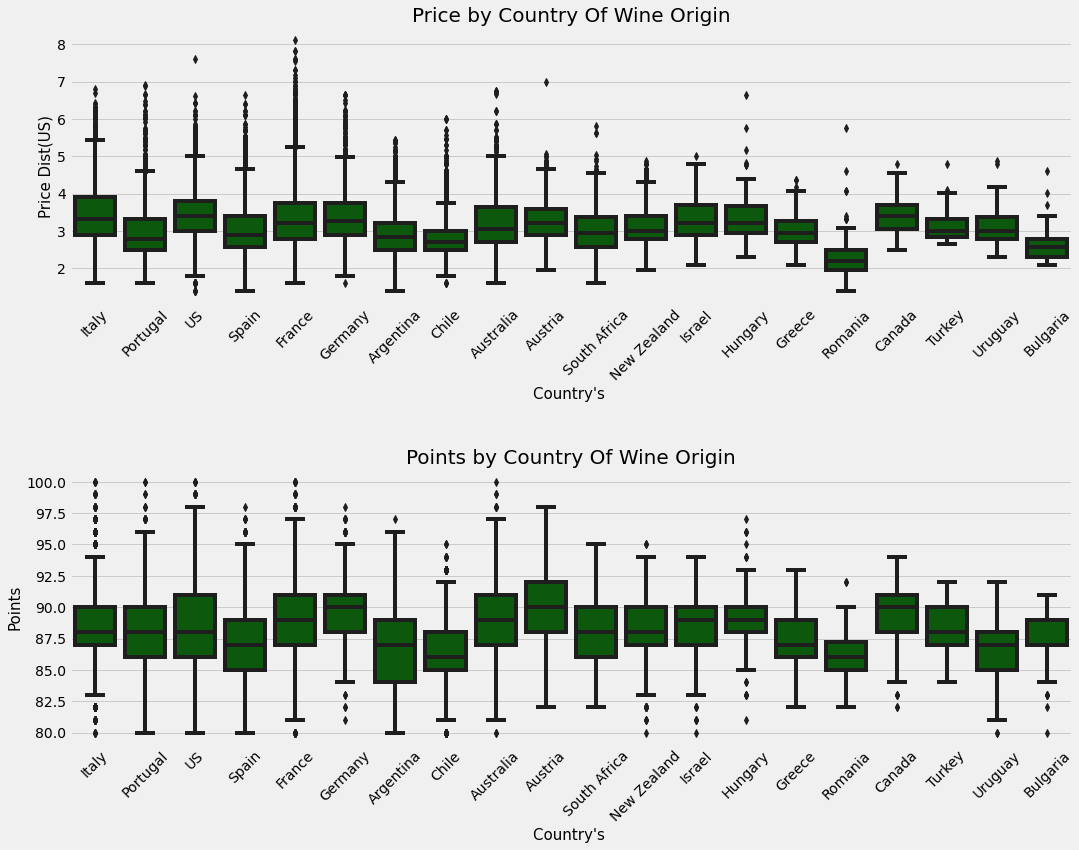

In [16]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df_wine1.loc[(df_wine1.country.isin(country.index.values))],
                 color='darkgreen')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df_wine1[df_wine1.country.isin(country.index.values)],
                 color='darkgreen')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

## Taking a look on values lowest than 500

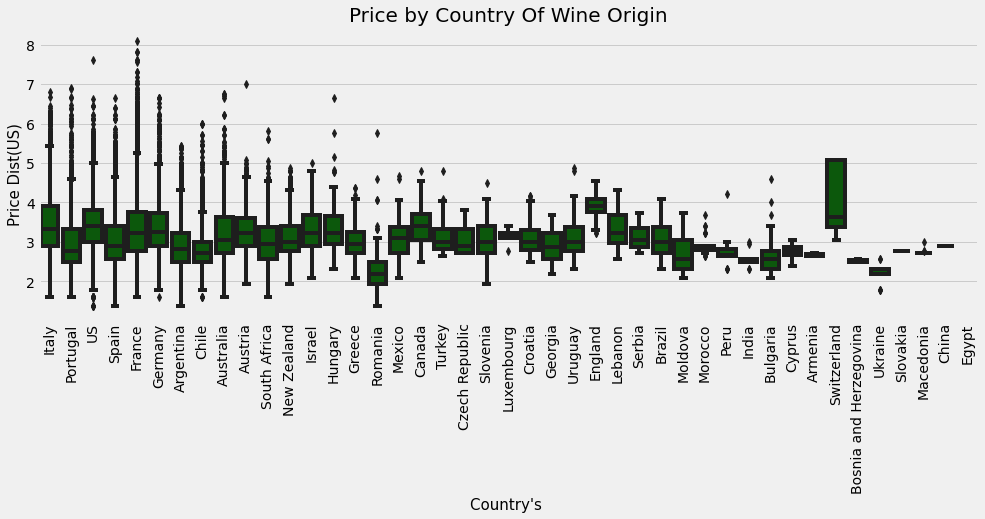

In [17]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price_log', color='darkgreen',
                  data=df_wine1)
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

It's very interesting that all wines have  quartiles in a values lower than 100

## Province Exploration

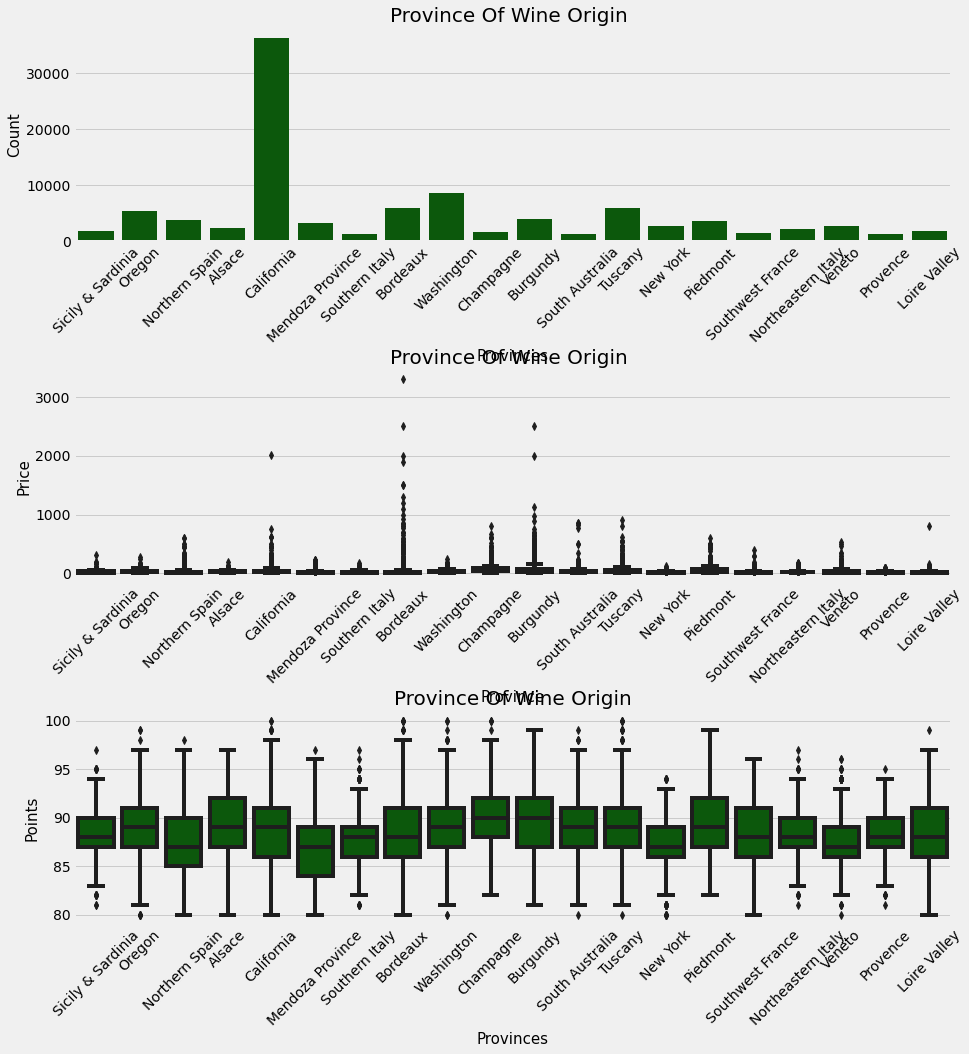

In [18]:
plt.figure(figsize=(14,15))

provinces = df_wine1['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='province', 
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))], 
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Provinces", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='province',
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))], 
                  color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='province',
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))], 
                  color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

# Taster Feature

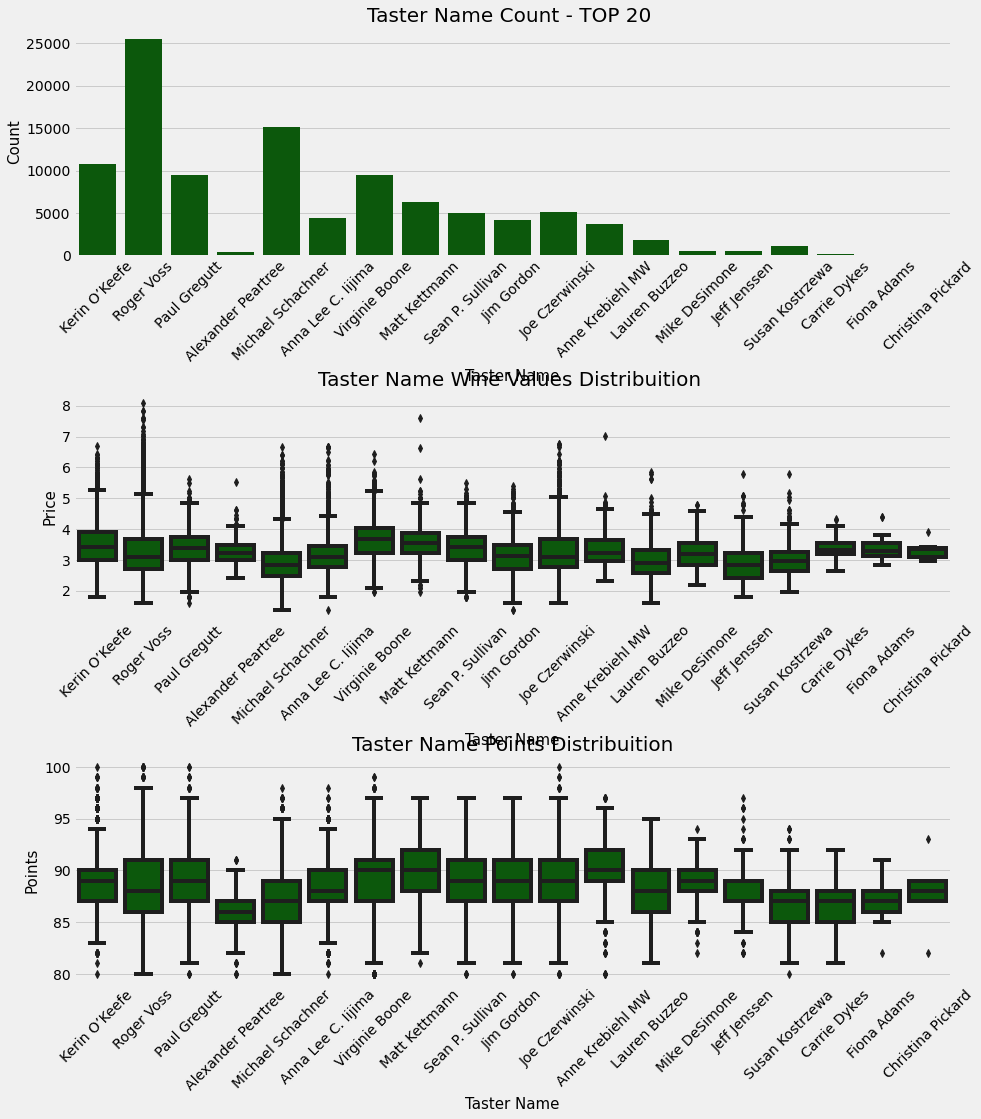

In [19]:
plt.figure(figsize=(14,16))

provinces = df_wine1['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='taster_name', data=df_wine1, color='darkgreen')
g.set_title("Taster Name Count - TOP 20 ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='taster_name', data=df_wine1, 
                 color='darkgreen')
g1.set_title("Taster Name Wine Values Distribuition ", fontsize=20)
g1.set_xlabel("Taster Name", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='taster_name',
                  data=df_wine1, color='darkgreen')
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

## PROVINVCE FEATURE

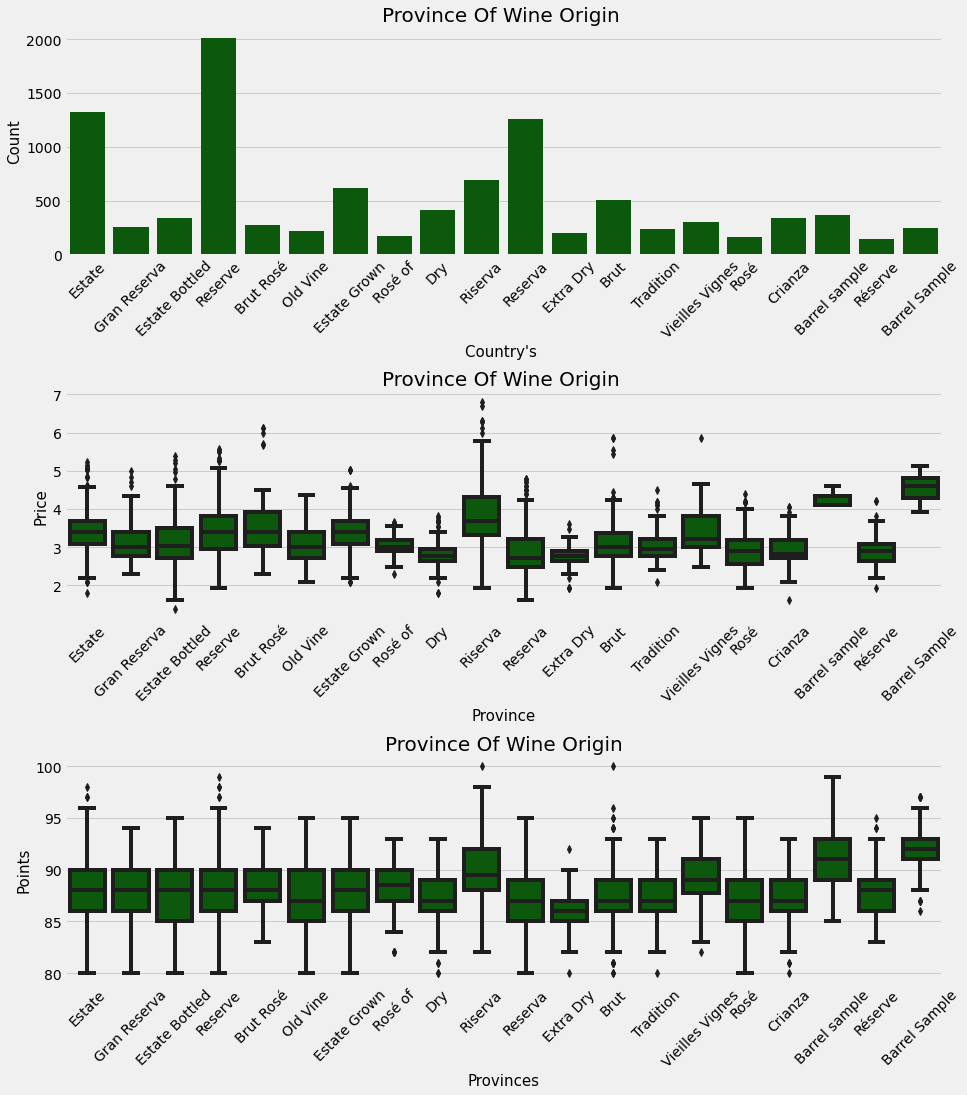

In [20]:
plt.figure(figsize=(14,16))

designation = df_wine1.designation.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='designation', 
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))],
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='designation',
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))], 
                 color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='designation',
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))], 
                 color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

## VARIETY FEATURE

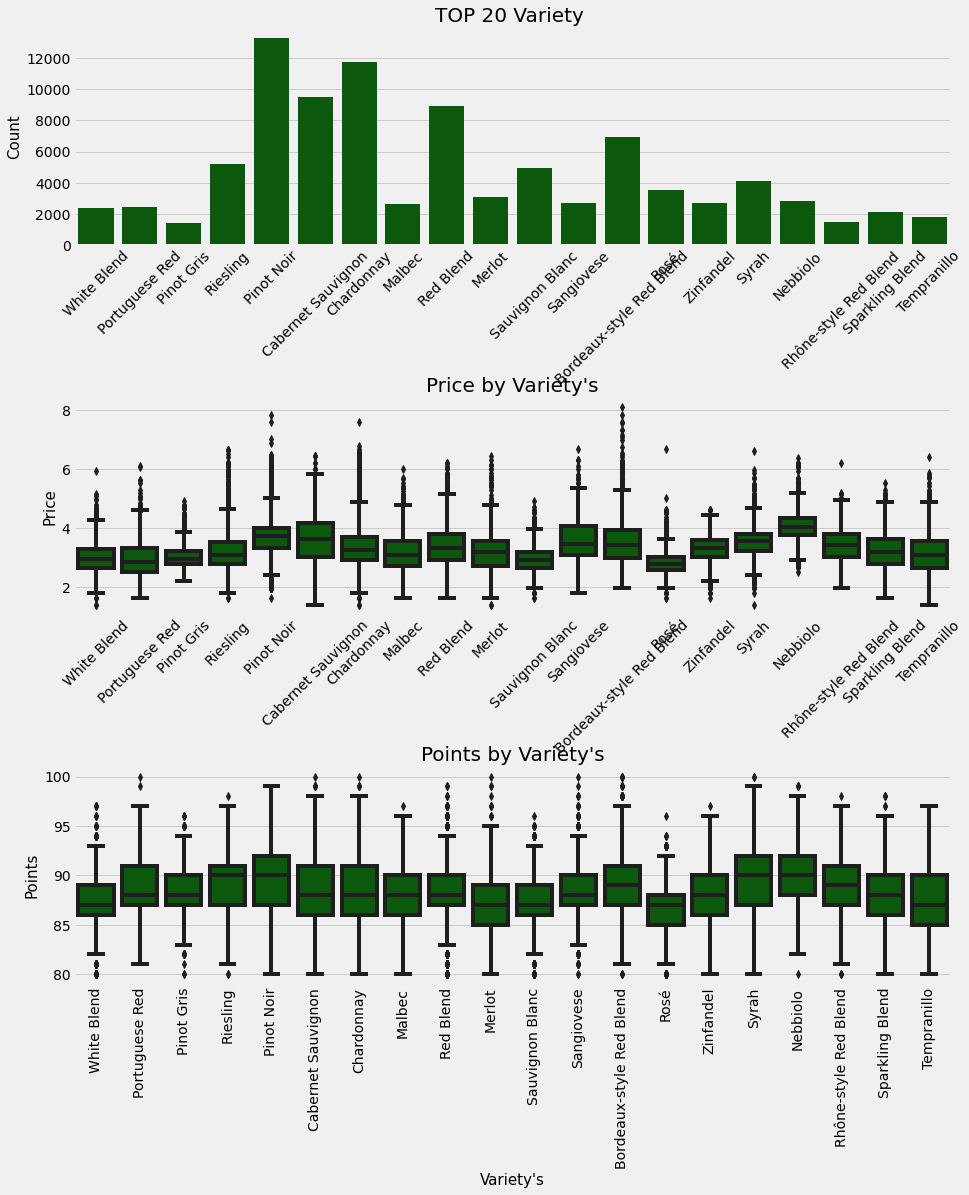

In [21]:
plt.figure(figsize=(14,16))

variety = df_wine1.variety.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='variety', 
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='variety',
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))], 
                 color='darkgreen')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))], 
                 color='darkgreen')
g2.set_title("Points by Variety's", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

## Let's take a look at Winery Distribuitions 

# Generate a word cloud image
mask = np.array(Image.open("img/france.png"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white",
                          mode="RGBA", max_words=5200, mask=mask).generate(fra)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/fra_wine.png", format="png")

#plt.show()

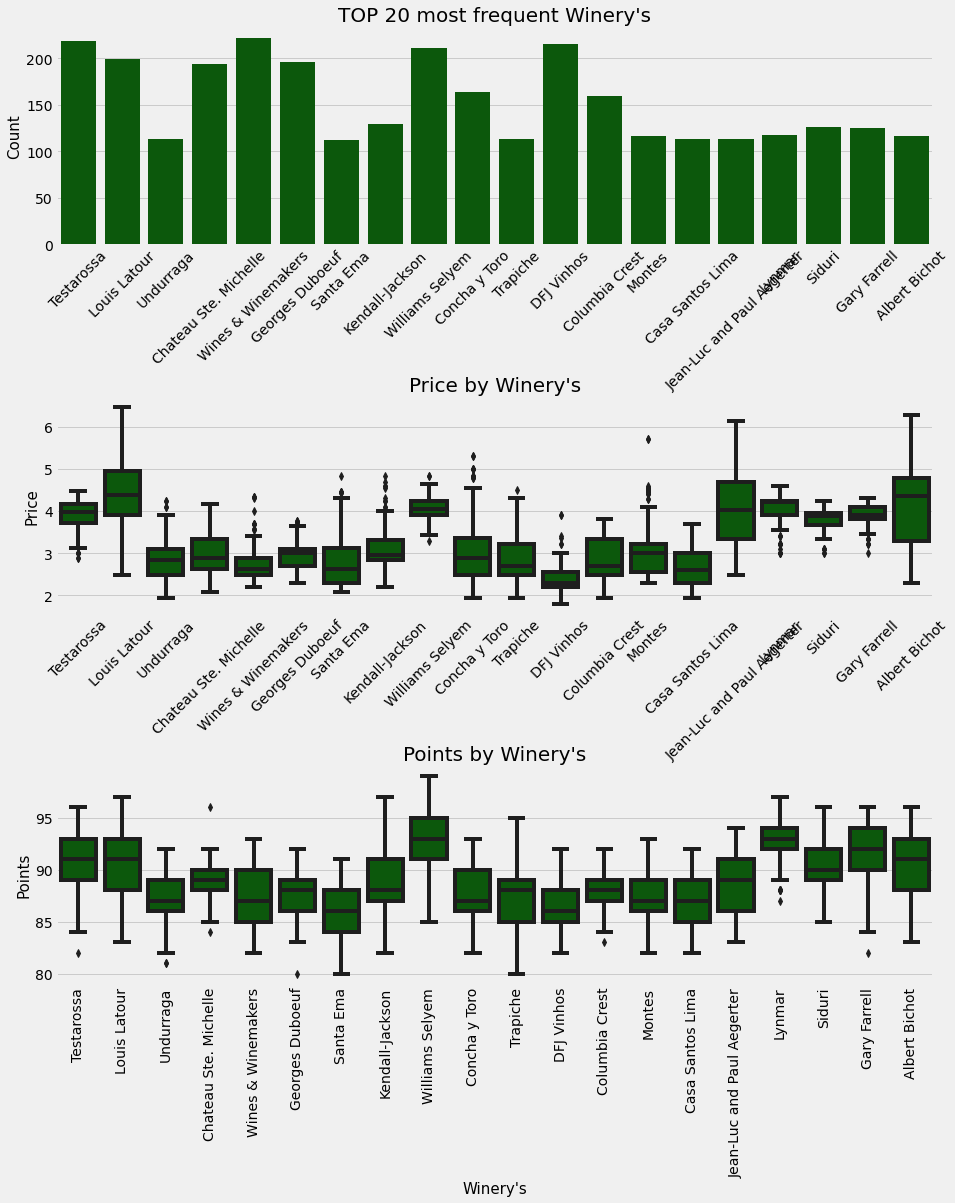

In [22]:
plt.figure(figsize=(14,16))

winery = df_wine1.winery.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='winery', 
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 most frequent Winery's", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='winery',
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))],
                 color='darkgreen')
g1.set_title("Price by Winery's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='winery',
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))],
                 color='darkgreen')
g2.set_title("Points by Winery's", fontsize=20)
g2.set_xlabel("Winery's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

We can see that some winery's have +- 200 label in his portfolio's. 

Also, we can verify that Willians Selyem have highest points distribuition

Better understanding the lenght of reviews

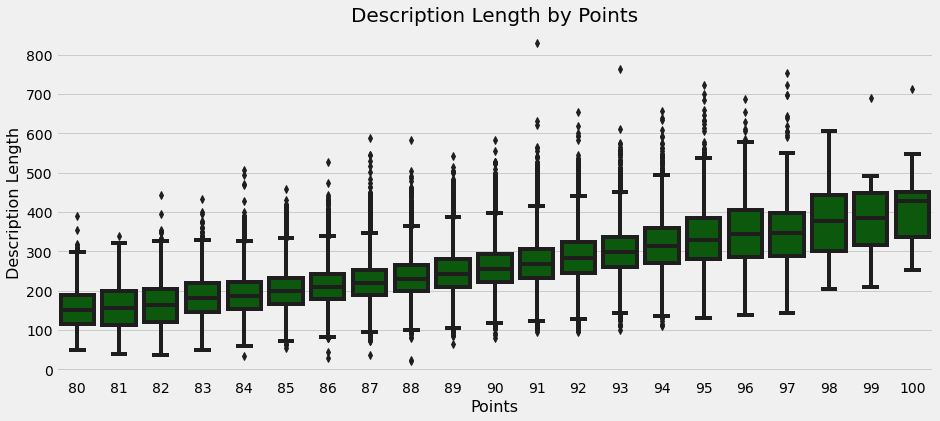

In [23]:
df_wine1 = df_wine1.assign(desc_length = df_wine1['description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=df_wine1,
                color='darkgreen')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

Very cool! We can see that the wine's with highest points also have the biggest descriptions length. It's very interesting to understand.


## Who are the sommeliers with biggest descriptions length?!

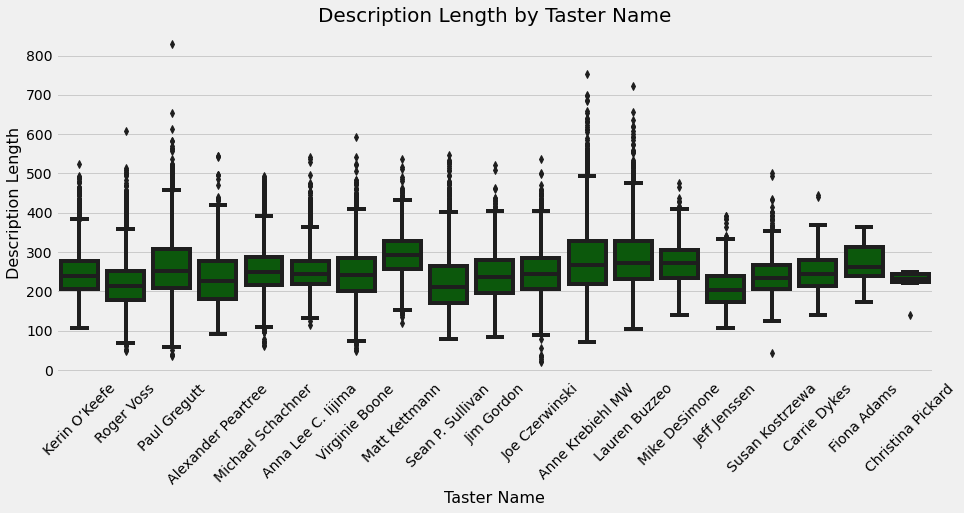

In [24]:
plt.figure(figsize=(14,6))

g = sns.boxplot(x='taster_name', y='desc_length', 
                data=df_wine1, color='darkgreen')
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Taster Name', fontsize = 16) # X label
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

Wow, we can see a difference description length per taster name

## Scatter plot of the description length and the price

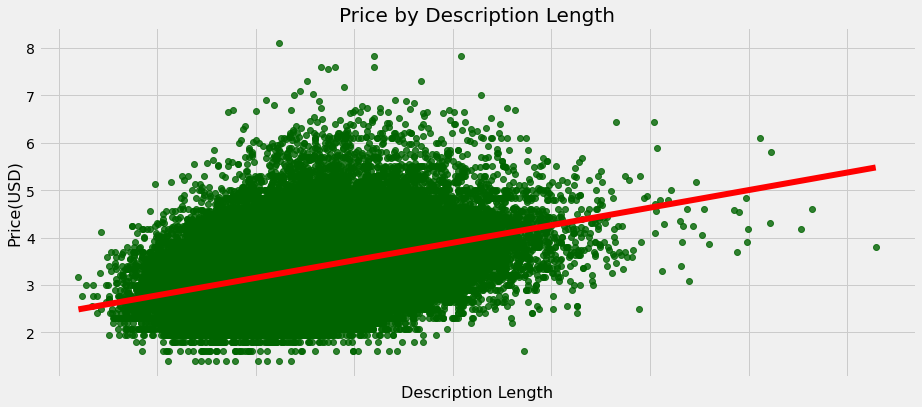

In [25]:
plt.figure(figsize=(14,6))

g = sns.regplot(x='desc_length', y='price_log', line_kws={'color':'red'},
                data=df_wine1, fit_reg=True, color='darkgreen', )
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()